<a href="https://colab.research.google.com/github/hongdaestreet/Data-Analysis-Basic-/blob/main/13_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,999 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

• scraping : 필요한 정보를 추출 및 가공하는 제공하는 S/W 기술</br>

• Web Scraping</br>
✓ 특정 웹 페이지에서 원하는 정보를 추출하는 것</br>
✓ HTML 페이지를 분석, 필요한 데이터 추출, 정제하여 분석에 사용</br>

• Web Crawling</br>
✓ 여러 웹 페이지 탐색, 링크로 연동, 새로운 페이지 발견, 수집 페이지 분석</br>
✓ 검색 엔진 등에서 사용되는 기술, 크롤러가 여러 웹 페이지를 순회하면서 인덱싱, 검색 결과 제공

• Beautiful Soup 모듈</br>
✓ HTML, XML 문서를 parsing하고, 원하는 정보를 추출하는 파이썬 라이브러리</br>
✓ HTML, XML과 같은 마크업 언어로 작성된 문서를 파싱, 문서 구조를 탐색, 특정 tag나 속성을 가진 요소를 찾아내는 기능 제공</br>
✓ 다양한 parser를 지원하며, 파서를 선택하고, 문서를 파싱하면, 파이썬 객체로 변환되어, 사용하기 쉬운 형태로 제공</br>
✓ CSS 선택자를 이용해 문서에서 특정 요소를 선택할 수 있는 기능 제공</br>
➢ HTML 문서에서 특정 태그, 클래스, 아이디 등을 쉽게 선택</br>

• 1. 웹 페이지 가져오기</br>
✓ urlopen으로 가져오는 방법</br>
➢ from urllib.request import urlopen</br>
➢ url = ‘주소’</br>
➢ webpage = urlopen(url).read().decode(‘utf-8’)</br>
✓ request로 가져오는 방법</br>
➢ import requests</br>
➢ url = ‘주소’</br>
➢ webpage = requests.get(url).text</br>

• 2. BeautifulSoup 객체 생성</br>
✓ from bs4 import BeautifulSoup as bs</br>
✓ 인스턴스명 = BeautifulSoup(markup, parser)</br>
✓ 첫 번째 인자 : HTML 형식의 문자열</br>
✓ 두 번째 인자 : 첫 번째 인자의 문자열을 해석하기 위한 파서</br>
✓ Parser 종류</br>
➢ html.parser : 파이썬 표준 라이브러리에 포함된 파서로, 빠르지만 유연하지 못함</br>
➢ lxml : 매우 빠르고 유연하지만 외부 의존</br>
➢ html5lib : 웹 브라우저와 동일한 방식으로 페이지 구문 분석하는 파서로, 매우 느리지만, 매우 유연, 외부의존</br>

• 3. BeautifulSoup 파싱 메소드</br>
✓ 태그명</br>
➢ .find(태그명) : 조건에 맞는 태그 1개만 찾음</br>
➢ .find_all(태그명) : 조건에 맞는 모든 태그 찾음</br>
✓ CSS 선택자</br>
➢ .select_one(선택자) : 조건에 맞는 CSS 선택자 1개만 찾음</br>
➢ .select(선택자) : 조건에 맞는 CSS 선택자 찾음</br>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://media.naver.com/press/437/ranking?/type=popular'
webpage = requests.get(url).text
webpage

'<!doctype html>\n<html lang="ko">\n\t<head>\n\t\t<title id="browserTitleArea">\n\n\nJTBC :: 네이버뉴스\n</title>\n\t\t\n\n\n<script>\n\tfunction isMobileDevice() {\n\t\treturn /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);\n\t}\n</script>\n<script>\n\t(function () {\n\t\ttry {\n\t\t\tif (isMobileDevice() && isAbleApplyPrefersColorScheme()) {\n\t\t\t\t\n\t\t\t\tdocument.querySelector("html").classList.add("DARK_THEME");\n\t\t\t}\n\t\t} catch(e) {}\n\n\t\tfunction isAbleApplyPrefersColorScheme() {\n\t\t\t\n\t\t\tif (window.matchMedia("(prefers-color-scheme)").matches === false) {\n\t\t\t\treturn false;\n\t\t\t}\n\n\t\t\tvar userAgent = navigator.userAgent;\n\n\t\t\tif (userAgent.indexOf("NAVER") > -1) {\n\t\t\t\t\n\t\t\t\tif (/.*NAVER\\([a-zA-Z]*;\\s[a-zA-Z]*;\\s([0-9]*);/.test(userAgent)) {\n\t\t\t\t\treturn Number(RegExp.$1) >= 1000;\n\t\t\t\t}\n\t\t\t} else {\n\t\t\t\t\n\t\t\t\treturn document.cookie.indexOf("NSCS=1") > -1;\n\t\t\t}\n\n\t\t\treturn false;\n\t\t}\n\t})();\n</

In [2]:
# BeautifulSoup 객체 생성 : html 문서형식으로 문자열 저장
soup = BeautifulSoup(webpage, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<title id="browserTitleArea">


JTBC :: 네이버뉴스
</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_press' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0

In [3]:
# 리스트 파일 확인
soup.select('li.as_thumb')

[<li class="as_thumb">
 <a class="_es_pc_link" data-pc-link="" href="https://n.news.naver.com/article/437/0000376048?ntype=RANKING" onclick="nclk(event, 'rnk.rnknws','','')">
 <em class="list_ranking_num">1</em>
 <div class="list_content">
 <strong class="list_title">엄마카드로 '공짜' 지하철 타던 직장인…부정승차 걸려 105만원 내</strong>
 <span class="list_view">
 <span class="blind">조회수</span>
                                                     15,653
                                                 
                                             
                                             
                                         
                                     </span>
 </div>
 <div class="list_img">
 <img height="100%" onerror="showNoImage(this)" src="https://mimgnews.pstatic.net/image/origin/437/2024/01/19/376048.jpg?type=nf148_148" width="100%"/>
 </div>
 </a>
 </li>,
 <li class="as_thumb">
 <a class="_es_pc_link" data-pc-link="" href="https://n.news.naver.com/article/437/0000376041?ntype=RANKING" 

In [4]:
# 딕셔너리 형태로 저장 후, 데이터프레임 생성
data = []
for item in soup.select('li.as_thumb'): # 'li' 태그 중 class가 'as_thumb'인 모든 요소를 선택
    rank = item.select_one('em.list_ranking_num').text  # 'em' 태그 중 class가 'list_ranking_num'인 요소의 텍스트를 추출
    title = item.select_one('strong.list_title').text
    views = item.select_one('span.list_view').text
    data.append({'Rank': rank, 'Title': title, 'Views': views})

df = pd.DataFrame(data)
df

,Rank,Title,Views
0,1,엄마카드로 '공짜' 지하철 타던 직장인…부정승차 걸려 105만원 내,\n조회수\n ...
1,2,"""'사지 들어' 직후 팔다리 들려 바로 끌려가"" [강성희 의원 인터뷰]",\n조회수\n ...
2,3,"[취재썰] ""조성경 차관님, 법카로 1인 10만원 코스요리 드셨죠?""",\n조회수\n ...
3,4,'대장동 50억 클럽 의혹' 박영수 전 특검 보석 석방,\n조회수\n ...
4,5,'이태원참사 부실대응' 김광호 서울경찰청장 불구속기소,\n조회수\n ...
5,6,"섬마을 주민, '추가 택배비' 40만원 받아...다리로 연결된 섬이라면?",\n조회수\n ...
6,7,빈살만도 두 손 든 '후티'…또 수조원 날리라고? 절레절레,\n조회수\n ...
7,8,"""너구리 쫓다 이제 부글부글 이슈 추적합니다""...논산 중학생 성폭행 뒷이야기",\n조회수\n ...
8,9,"'영풍제지 주가조작' 일당, 재판서 혐의 인정...""주범 이씨가 시키는 대로 했다""",\n조회수\n ...
9,10,"[전문]이언주 “김건희 여사 황후마마인가...디올백은 뇌물, 사과 아닌 수사받아야”",\n조회수\n ...


In [5]:
# 불필요한 데이터 형식 확인
df['Views'][0]

'\n조회수\n                                                    15,653\n                                                \n                                            \n                                            \n                                        \n                                    '

In [6]:
df['Views'] = df['Views'].str.replace('\n조회수\n','').str.replace('\n','').str.replace(',','')
df

,Rank,Title,Views
0,1,엄마카드로 '공짜' 지하철 타던 직장인…부정승차 걸려 105만원 내,...
1,2,"""'사지 들어' 직후 팔다리 들려 바로 끌려가"" [강성희 의원 인터뷰]",...
2,3,"[취재썰] ""조성경 차관님, 법카로 1인 10만원 코스요리 드셨죠?""",...
3,4,'대장동 50억 클럽 의혹' 박영수 전 특검 보석 석방,...
4,5,'이태원참사 부실대응' 김광호 서울경찰청장 불구속기소,...
5,6,"섬마을 주민, '추가 택배비' 40만원 받아...다리로 연결된 섬이라면?",...
6,7,빈살만도 두 손 든 '후티'…또 수조원 날리라고? 절레절레,...
7,8,"""너구리 쫓다 이제 부글부글 이슈 추적합니다""...논산 중학생 성폭행 뒷이야기",...
8,9,"'영풍제지 주가조작' 일당, 재판서 혐의 인정...""주범 이씨가 시키는 대로 했다""",...
9,10,"[전문]이언주 “김건희 여사 황후마마인가...디올백은 뇌물, 사과 아닌 수사받아야”",...


In [7]:
df['Views'] = df['Views'].str.replace('\n조회수\n','').str.replace('\n','').str.replace(',','').str.strip()
df

,Rank,Title,Views
0,1,엄마카드로 '공짜' 지하철 타던 직장인…부정승차 걸려 105만원 내,15653
1,2,"""'사지 들어' 직후 팔다리 들려 바로 끌려가"" [강성희 의원 인터뷰]",10839
2,3,"[취재썰] ""조성경 차관님, 법카로 1인 10만원 코스요리 드셨죠?""",5690
3,4,'대장동 50억 클럽 의혹' 박영수 전 특검 보석 석방,5198
4,5,'이태원참사 부실대응' 김광호 서울경찰청장 불구속기소,4420
5,6,"섬마을 주민, '추가 택배비' 40만원 받아...다리로 연결된 섬이라면?",4234
6,7,빈살만도 두 손 든 '후티'…또 수조원 날리라고? 절레절레,3964
7,8,"""너구리 쫓다 이제 부글부글 이슈 추적합니다""...논산 중학생 성폭행 뒷이야기",3776
8,9,"'영풍제지 주가조작' 일당, 재판서 혐의 인정...""주범 이씨가 시키는 대로 했다""",3577
9,10,"[전문]이언주 “김건희 여사 황후마마인가...디올백은 뇌물, 사과 아닌 수사받아야”",3274


언론사별 URL 주소 확인

In [12]:
# 함수를 작성하여 각 언론사별 뉴스 기사 스크래핑
import requests
from bs4 import BeautifulSoup   # HTML 문서를 파싱하고, 사용자가 특정 태그나 속성을 이용해 데이터를 추출 도와주는 라이브러리
import pandas as pd

def getDataNews(press, code):
    url = f'https://media.naver.com/press/{code}/ranking?/type=popular'
    response = requests.get(url)                            # 생성된 URL에 대한 HTTP GET 요청을 보냄
    soup = BeautifulSoup(response.text, 'html.parser')      # 받아온 HTML을 BeautifulSoup을 사용하여 파싱

    data = []
    for item in soup.select('li.as_thumb'):
        rank = item.select_one('em.list_ranking_num').text
        title = item.select_one('strong.list_title').text
        views = item.select_one('span.list_view').text
        data.append({'순위': rank, '기사제목': title, '조회수': views}) # 순위, 기사제목, 조회수 정보 리스트에 추가

    df = pd.DataFrame(data) # 데이터프레임으로 변환
    df['조회수'] = df['조회수'].str.replace('\n조회수\n','').str.replace('\n','').str.replace(',','').str.strip()
    df['언론사'] = press        #  최종적으로 데이터프레임에 언론사 정보를 추가
    return df

In [13]:
getDataNews('연합뉴스', '422')

,순위,기사제목,조회수,언론사
0,1,"사면초가 우크라이나…젤렌스키 ""트럼프가 뭘 할지 걱정""",13441,연합뉴스
1,2,"이준석 ""내가 이낙연이면 계양 출마""…이낙연 ""일일이 대답 안해""",5339,연합뉴스
2,3,"BBC ""한국 드라마 본 북 10대에 12년 노동형 선고 영상 입수""",5284,연합뉴스
3,4,"[속보] 민주 임종성, 총선 불출마…""한걸음 물러나겠다""",3463,연합뉴스
4,5,고삐 풀린 중동전쟁 불씨…통제불능 치닫나,2711,연합뉴스
5,6,"이재명, 피습 후 17일 만에 첫 재판 출석",1589,연합뉴스
6,7,여 '명품백' 논란 계속…여야 이태원법 '거부권' 공방,1425,연합뉴스
7,8,"북한 ""수중 핵무기체계 중요시험 진행""…한미일 해상훈련 반발",1148,연합뉴스
8,9,[날씨] 모레까지 영동 많은 눈…주말 전국 곳곳 비나 눈,850,연합뉴스
9,10,"""영탁이 150억 요구""…막걸리 제조사 대표 명예훼손 유죄",278,연합뉴스


In [16]:
# MBC, 연합뉴스, KBS, JTBC 기사 스크래핑
pressDt = {'MBC':'214', '연합뉴스':'422', 'KBS':'056', 'JTBC':'437'}
newdf = pd.DataFrame()
for k,v in pressDt.items(): # k: key, v: value
    newdf = pd.concat([newdf, getDataNews(k,v)])

newdf

,순위,기사제목,조회수,언론사
0,1,"""150억 요구·돼지머리 고사 강요"" 영탁 '갑질' 주장한 대표 결국‥",23098,MBC
1,2,"마포을 공천 잡음에 김경율 ""김성동에 죄송""‥김성동 ""충격·참담""",14351,MBC
2,3,"""한동훈은 시시하다"" ""한동훈이 빠지기 쉬운 착각""‥'김건희 리스크' 돌파가 관건",13944,MBC
3,4,"""몰래녹음 증거 되면 묵언수행""‥""중증 장애라 다른 방법 없어""",12904,MBC
4,5,윤 대통령 지지율 32%‥국민의힘 36%·민주 33%·무당층 26% [한국갤럽],12393,MBC
...,...,...,...,...
15,16,"""영탁이 150억원 요구"" 막걸리 분쟁...업체 대표 징역형",764,JTBC
16,17,꿈쩍 않는 '용퇴론' 신호탄 되나…'86그룹·용인 3선' 김민기 불출마,719,JTBC
17,18,"[사반 제보] ""저보다 자기 엄마를 더 챙기는 남편…이젠 너무 지쳤어요""",525,JTBC
18,19,"""한국 심판 때문"" 중국 누리꾼 주장에 서경덕 ""매너부터 갖추길""",352,JTBC


In [15]:
# 조회수 상위 10개 기사 언론사
newdf10 = newdf.sort_values(by='조회수',ascending=False).head(10)
newdf10.value_counts('언론사')

언론사
MBC     4
JTBC    3
KBS     2
연합뉴스    1
dtype: int64

In [17]:
df.columns

Index(['Rank', 'Title', 'Views'], dtype='object')

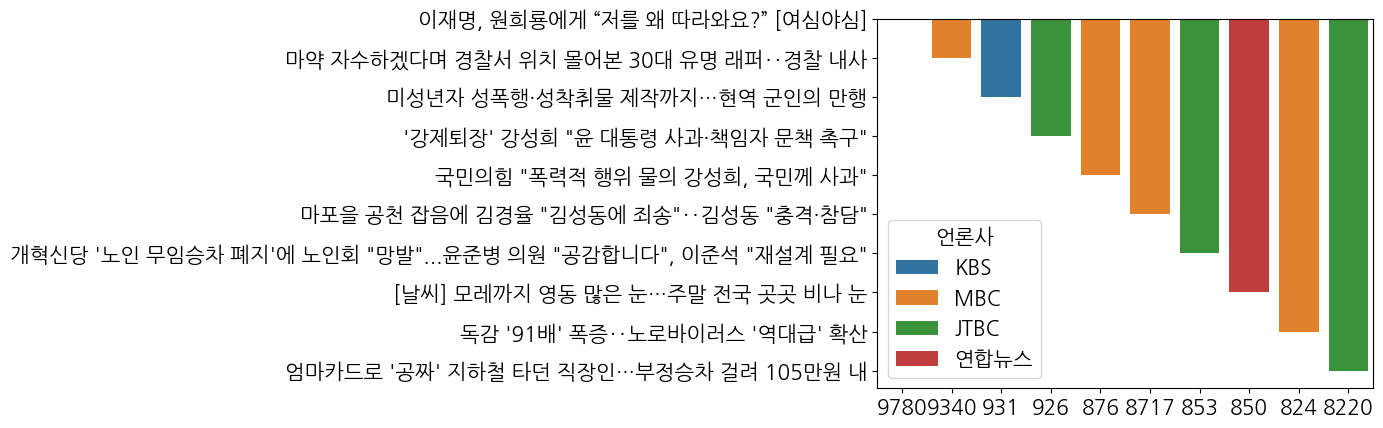

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False


sns.barplot(x='조회수',y='기사제목',hue='언론사',data=newdf10)
plt.xlabel('')
plt.ylabel('')
plt.show()